In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from os import path
import sklearn.datasets

sns.set()

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


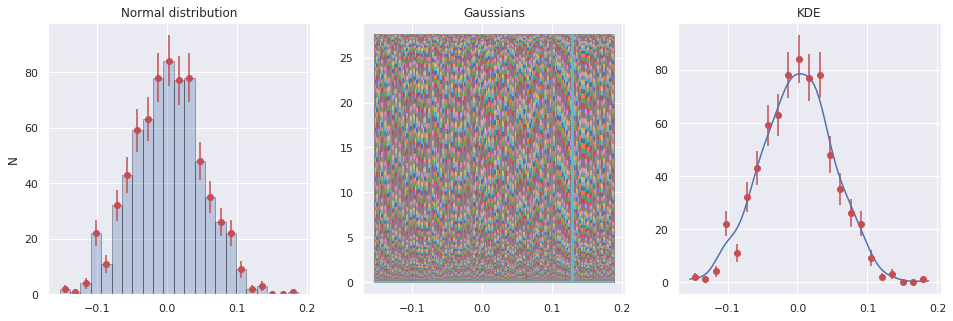

In [2]:
mean = 0
sigma = 0.05
N = 700

x = np.random.normal(mean, sigma, N) # Normal distributed values

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16, 5))

n, bins, patches = ax1.hist(x, bins="auto", alpha=0.3, ec="black")

# errors
errors = np.sqrt(n)
bin_centers = []
for i in range (len(bins)-1):
    bin_centers.append(0.5*(bins[i+1]+bins[i]))


###KDE

# gaussians
st_der = 1.06*x.std()*x.size**(-1/5)

points = np.linspace(x.min(), x.max(), N)
gaussians = np.zeros((N, N))
for i in range(N):
    gaussians[i] = scipy.stats.norm.pdf(x=points, loc=x[i], scale=st_der)


# perform kde
G = gaussians.sum(axis=0)
Norm = np.sum(np.diff(bins)*n) / scipy.integrate.trapz(y=G, x=points)

#plots
ax1.errorbar(bin_centers, n, yerr=errors, fmt="ro")
ax1.set_ylabel("N")
ax1.set_title("Normal distribution")
ax1.set_ylabel("N")
ax2.plot(points,gaussians)
ax2.set_title("Gaussians")

ax3.errorbar(bin_centers, n, yerr=errors, fmt="ro")
ax3.plot(points, G*Norm)
ax3.set_title("KDE");

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

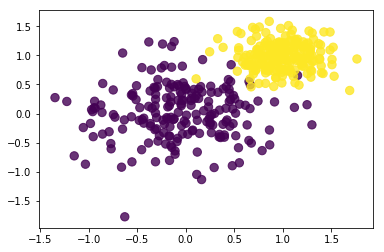

In [3]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


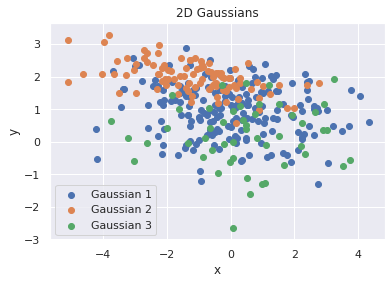

In [4]:
fig, ax = plt.subplots()

def Gaussian2D(mean, std, N): 
    G = []
    num = len(mean)
    for i in range(num):
        G.append(np.random.multivariate_normal(mean[i], std[i], N[i]))
    return G


m1 = np.array([0, 1])
m2 = np.array([-1, 2])
m3 = np.array([0.25, 0.3])
mean  = [m1, m2, m3]

#generate posidive definite symmetric matrices
cov1=sklearn.datasets.make_spd_matrix(2)
cov2=sklearn.datasets.make_spd_matrix(2)
cov3=sklearn.datasets.make_spd_matrix(2)
cov   = [cov1, cov2, cov3]
N1 = 200
N2 = 100
N3 = 50
N  = [N1, N2, N3]

gauss = Gaussian2D(mean, cov, N)


for i in range(len(gauss)):
    ax.scatter(x=gauss[i][:,0], y=gauss[i][:,1], label="Gaussian "+str(i+1))
    
ax.legend()
ax.set_title("2D Gaussians")
ax.set_xlabel("x")
ax.set_ylabel("y");

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

Dataset Already available

Scipy regression:
Slope = 0.0032597701220305835
Intercept = -0.15432816763069473


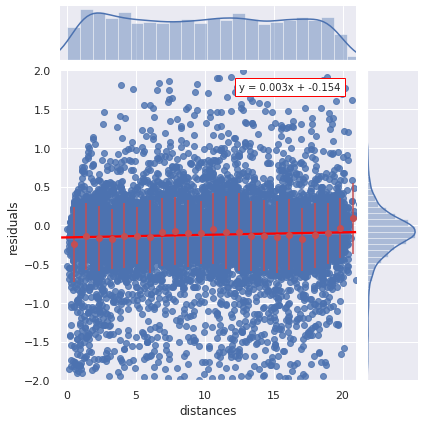

In [7]:
#if needed, download the data
if path.exists('residuals_261.npy')==False:
    ! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
else: 
    print('Dataset Already available')
    
data = np.load("./residuals_261.npy",allow_pickle=True).item()
dataset = pd.DataFrame(data)


#Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
dataset = dataset[abs(dataset["residuals"]) < 2]


# linear regression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=dataset["distances"], y=dataset["residuals"])
print("\nScipy regression:")
print("Slope =", slope)
print("Intercept =", intercept)

#plot and show result on plot
ax = sns.jointplot(x="distances", y="residuals", data=dataset, kind="reg", xlim=[-0.5, 21], ylim=[-2,2], joint_kws={'line_kws':{'color':'red'}})
plt.text(x=12.5, y=1.75, s="y = {0:.3f}x + {1:.3f}".format(slope, intercept), bbox=dict(ec='red',fc="white"))

n, bins = np.histogram(dataset["distances"], bins="auto")
x = []
for i in range (len(n)):
    x.append(0.5*(bins[i+1]+bins[i]))
dataset["bin"] = ""

for i in range(len(x)):
    mask = (bins[i] < dataset["distances"]) & (dataset["distances"] < bins[i+1])
    dataset.loc[mask, "bin"] = i
    
y = dataset.groupby("bin").mean()["residuals"].values
err_y = dataset.groupby("bin").std()["residuals"].values
plt.errorbar(x, y, yerr=err_y, fmt="ro");